In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import warnings

class ComplexExp(object):
    def __init__(self, k, N):
        self.k = k
        self.N = N

        self.n = np.arange(N)

        # Vector containing elements of the complex exponential
        self.exp_kN = np.exp(2j*cmath.pi*k*self.n/ N)
        self.exp_kN *= 1 / (np.sqrt(N))

        # Real and imaginary parts
        self.exp_kN_real = self.exp_kN.real
        self.exp_kN_imag = self.exp_kN.imag

In [18]:
#prof's code
class sqpulse(object):
    def __init__(self, T0, T, fs):
        self.N=np.int(np.floor(T*fs))
        self.M=np.int(np.floor(T0*fs))
        
        self.pulse=np.concatenate((np.ones(self.M),np.zeros(self.N-self.M)))
        self.pulse*=1/np.sqrt(self.M)

        self.t=np.arange(0,T,1/fs)

class dft():
    def __init__(self, x, fs, K=None):
        self.x=x
        self.fs=fs
        self.N=len(x)
        if K == None:
            K = len(self.x)
        self.K=K
        self.f=np.arange(self.K)*self.fs/self.K
        self.f_c=np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K

    def first(self):
        X=np.fft.fft(self.x,self.K)/np.sqrt(self.N)
        # \\\\\ CENTER FFT.
        X_c=np.roll(X,np.int(np.ceil(self.K/2-1))) # Circularly shift X to get it centered in f_c==0
        return [self.f,X,self.f_c,X_c]



def energy(f, X,  interval):
    """
    energy computes the energy of a signal in a frequency interval
    X: DFT of signal (array)
    f: frequency array of signal DFT
    interval: Frequency interval (list of len()=2 of int), interval[0]=<interval[1]
    :return: Energy of signal in interval (float)
    """
    aux=0
    for i,freq in enumerate(f):
        if freq>=interval[0] and freq<=interval[1]:
            aux=aux+abs(X[i]*np.conjugate(X[i]))

    return aux

class tripulse(object):
    """
    tripulse Generates a unit-energy triangular pulse
 	tripulse(T0,T,fs) generates a unit-energy triangular pulse x(t) of 
 	duration T sampled at frequency fs and with active duration T0.
 	Vector t contains the time indices (x axis) and vector x contains
 	the values of the signal (y axis).
    Arguments:
        T0: width of triangular pulse (int)
        T: duration of the signal (int)
        fs: sampling frequncy (int)
 	See also sqpulse.
    """
    def __init__(self, T0, T, fs):
        self.N=np.int(np.floor(T*fs))
        self.M=np.int(np.floor(T0*fs))

        # Create the active part
        ascendent_part = np.arange(0,np.ceil(T0/2*fs))
        descendent_part = np.arange(np.ceil(T0/2*fs)-1,0,-1)

        # Construct the triangular pulse
        self.pulse=np.concatenate((ascendent_part,descendent_part,np.zeros(self.N-len(ascendent_part)-len(descendent_part))))

        # Normalize
        self.pulse*=1/np.linalg.norm(self.pulse)

        # Create the time array
        self.t=np.arange(0,T,1/fs)

class kaiser_window(object):
    """
    Generates a kaiser window signal
    Arguments:
        beta: beta parameter of the Kaiser window
        T: duration of the signal (int)
        fs: sampling frequncy (int)
    """

    def __init__(self, beta, T, fs):
        self.N = np.int(np.floor(T * fs))

        # Create the active part
        self.signal=np.kaiser(self.N,beta)

        # Normalize
        self.signal *= 1 / np.linalg.norm(self.signal)

        # Create the time array
        self.t = np.arange(0, T, 1 / fs)

In [19]:


def part_12_alt(T, fs, T0s):
    for T0 in T0s:
        sqpulse_signal = sqpulse(T0, T, fs)
        sqpulse_dft = dft(sqpulse_signal.pulse, fs)
        [freqs,X,f_c,X_c]=sqpulse_dft.first()

        # Compute the enegy in interval
        Total_ener=np.sum(abs(X_c)**2)
        Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
        print('Energy fraction of a square pulse of T0=%3.2f is %5.4f'%(T0, Partial_ener/Total_ener))

        # Plot
        fig, axs = plt.subplots(2)
        axs[0].grid()
        axs[1].grid()
        fig.suptitle('Square Pulse of Width %3.2fs '%(T0))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        axs[0].plot(sqpulse_signal.t, sqpulse_signal.pulse)
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Signal')
        axs[1].plot(f_c,abs(X_c))
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('DFT')
        plt.savefig('square_pulse_'+str(T0)+'.png')
        plt.show()

def part_13_alt(T, fs, T0s):
    for T0 in T0s:
        tripulse_signal = tripulse(T0, T, fs)
        tripulse_dft = dft(tripulse_signal.pulse, fs)
        [freqs,X,f_c,X_c]=tripulse_dft.first()

        # Compute the enegy in interval
        Total_ener=np.sum(abs(X_c)**2)
        Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
        print('Energy fraction of a square pulse of T0=%3.2f is %5.4f'%(T0, Partial_ener/Total_ener))

        # Plot
        fig, axs = plt.subplots(2)
        axs[0].grid()
        axs[1].grid()
        fig.suptitle('Triangle Pulse of Width %3.2fs '%(T0))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        axs[0].plot(tripulse_signal.t, tripulse_signal.pulse)
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Signal')
        axs[1].plot(f_c,abs(X_c))
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('DFT')
        plt.savefig('triangle_pulse_'+str(T0)+'.png')
        plt.show()

def part_14_alt(T, fs, T0s):
    for T0 in T0s:
        kaiser_signal = kaiser_window(T0, T, fs)
        kaiser_dft = dft(kaiser_signal.signal, fs)
        [freqs,X,f_c,X_c]=kaiser_dft.first()

        # Compute the enegy in interval
        Total_ener=np.sum(abs(X_c)**2)
        Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
        print('Energy fraction of a kaiser window of T0=%3.2f is %5.4f'%(T0, Partial_ener/Total_ener))

        # Plot
        fig, axs = plt.subplots(2)
        axs[0].grid()
        axs[1].grid()
        fig.suptitle('Kaiser Window of Width %3.2fs '%(T0))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        axs[0].plot(kaiser_signal.t, kaiser_signal.signal)
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Signal')
        axs[1].plot(f_c,abs(X_c))
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('DFT')
        plt.savefig('kaiser_window_'+str(T0)+'.png')
        plt.show()


In [20]:
def sound(f, T, fs):
    if fs < 0:
        fs = - fs

    if f < 0:
        f = -f
    # Duration of the discrete signal
    N = math.floor(T * fs)
    # Discrete frequency
    t = np.linspace(0, (N - 1) / fs, N)
    k = N * f / fs
    # Complex exponential
    comp_eq = ComplexExp(k, N)
    
    x = comp_eq.exp_kN
    x = np.sqrt(N) * x
    return t, x, N

In [21]:
def q_31(f0, T, fs):
    """
    Question 3.1: DFT of an A note
    Arguments:
        T: duration of the signal (int)
        fs: sampling frequency (int)
        f0: frequency of the note (int)
    """
    # Retrieves complex exponential
    t, cpxexp, num_samples = sound(f0, T, fs)
    cos = np.real(cpxexp)
    # Obtain the DFT
    Anote_dft = dft(cos, fs)
    [freqs, X, f_c, X_c] = Anote_dft.first()
    # print(f_c[np.where(f_c == f0)], fs*np.where(freqs == f0)[0]/len(f_c),np.where(freqs == f0))

    # DFT Conjugate symmetric
    # Obtain the DFT
    print('The norm of the signal of an A note is',np.linalg.norm(abs(np.real(cpxexp)))**2)
    print('The norm of the DFT of an A note is',np.linalg.norm(abs(X_c))**2)

    # Plot
    plt.figure()
    plt.grid(True)
    plt.plot(f_c, abs(X_c))
    plt.xlim((-500,500))
    plt.title('DFT of an A note')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.savefig('Anote_signal_dft.png')
    plt.show()

The norm of the signal of an A note is 44100.000000000015
The norm of the DFT of an A note is 44100.00000000002


/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_6478/1851887447.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_c=np.roll(X,np.int(np.ceil(self.K/2-1))) # Circularly shift X to get it centered in f_c==0


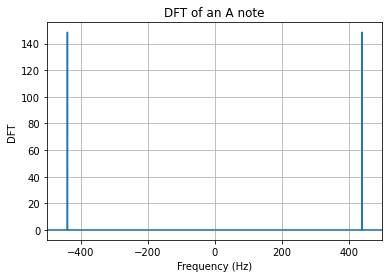

In [24]:
q_31(440, 2, 44100)

In [25]:
def q_32(list_notes, list_times, fs):
    """
    Question 3.2: DFT of an song
    Arguments:
        list_notes: list of notes of the song (list)
        list_times: list of the times of each note (list)
        fs: sampling frequency (int)
    """
    assert len(list_notes) == len(list_times), "List of musical notes and musical times should have same length"
    song = []
    for note, note_time in zip(list_notes, list_times):
        fi = 2**((note - 49) / 12)*440
        _, x, N = sound(fi, note_time, fs)
        song = np.append(song, x.real)
        song = np.append(song, np.zeros(10))

    Anote_dft = dft(song, fs)
    [freqs, X, f_c, X_c] = Anote_dft.first()


    plt.plot(f_c, abs(X_c))
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.title('DFT of Minuet in G Major')

    plt.figure()
    plt.plot(f_c, abs(X_c))
    plt.xlim((-2000,2000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.title('DFT of Minuet in G Major')
    plt.savefig('song_dft.png')
    plt.show()
    return song,f_c, X_c

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_6478/1851887447.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_c=np.roll(X,np.int(np.ceil(self.K/2-1))) # Circularly shift X to get it centered in f_c==0


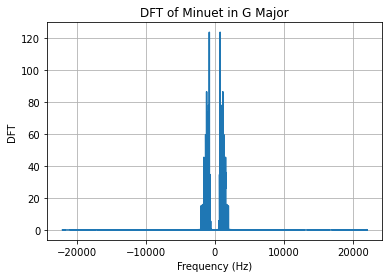

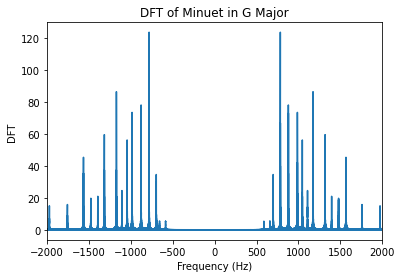

In [26]:

C4=40
D4=42
D4s=43
E4=44
F4=45
G4=47
A4=49
A4s=50
B4=51
C5=52
D5=54
D5s=55
E5=56
F5=57
G5=59
A5=61
A5s=62
B5=63
C6=64
C6s=65
D6=66
E6=68
F6=69
F6s=70
G6=71
A6=73
B6=75

song_notes = [D6, G5, A5, B5, C6, D6, G5, G5, E6, C6, D6, E6, F6s, G6, G5, G5, C6, D6, C6, B5, A5, B5, C6, B5, A5, G5, F5, G5, A5, B5, G5, B5, A5,
            D6, G5, A5, B5, C6, D6, G5, G5, E6, C6, D6, E6, F6s, G6, G5, G5,
            C6, D6, C6, B5, A5, B5, C6, B5, A5, G5, A5, B5, A5, G5, F5, G5,
            B6, G6, A6, B6, G6, A6, D6, E6, F6s, D6, G6, E6, F6s, G6, D6, C6s, B5, C6, A5,
            A5, B5, C6s, D6, E6, F6, G6, F6, E6, F6, A5, C6s, D6,
            D6, G5, F5, G5, E6, G5, F5, G5, D6, C6, B5, A5, G6, F5, G5, A5,
            D5, E5, F5, G5, A5, B5, C6, B5, A5, B5, D6, G5, F5, G5]

rhythm=1
b = 1*rhythm
w = 2*rhythm
h = 0.5*rhythm
dw = 3*rhythm
song_times = [b, h, h, h, h, b, b, b, b, h, h, h, h, b, b, b,
            b, h, h, h, h, b, h, h, h, h, b, h, h, h, h, b, w,
            b, h, h, h, h, b, b, b, b, h, h, h, h, b, b, b,
            b, h, h, h, h, b, h, h, h, h, b, h, h, h, h, dw,
            b, h, h, h, h, b, h, h, h, h, b, h, h, h, h, b, h, h, b,
            h, h, h, h, h, h, b, b, b, b, b, b, dw,
            b, h, h, b, b, h, h, b, b, b, b, h, h, h, h, b,
            h, h, h, h, h, h, b, b, b, h, h, b, b, dw]


song,f_c, X_c=q_32(song_notes, song_times, 44100)